In [76]:
import cv2
from skimage import io
import tensorflow as tf
import tensorflow.keras.layers as L
from matplotlib import pyplot as plt
from tensorflow.keras.models import *

In [77]:
from root.reverse_search.helpful_functions import image2array

PATH = '../../Resources/training'
TRAIN_DATA = image2array(path=PATH)
IMG_SHAPE = TRAIN_DATA.shape[1:]

PATH_TO_EXAMPLES = [
    PATH + '/' + '2006422.jpg.jpg',
    PATH + '/' + '4529397.jpg.jpg',
    PATH + '/' + '6674082.jpg.jpg',
    PATH + '/' + '20670036.jpg.jpg',
]

In [78]:
from root.reverse_search.CAEs.auto_encoder import AutoEncoder

autoencoder = AutoEncoder(IMG_SHAPE, code_size=32)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │     1,605,664 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,994,080 (7.61 MB)

 Trainable params: 1,994,080 (7.61 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 50176)          │     1,655,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_16             │ (None, 28, 28, 128)    │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_17             │ (None, 56, 56, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_18             │ (None, 112, 112, 32)   │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_19             │ (None, 224, 224, 3)    │           867 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,043,971 (7.80 MB)

 Trainable params: 2,043,971 (7.80 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
inp = L.Input(IMG_SHAPE)
code = autoencoder.encoder(inp)
reconstruction = autoencoder.decoder(code)

In [80]:
tf_autoencoder = tf.keras.models.Model(inputs=inp, outputs=reconstruction)
tf_autoencoder.compile(optimizer="adamax", loss='mse')
tf_autoencoder.fit(x=TRAIN_DATA, y=TRAIN_DATA, epochs=10, verbose=1)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 236s 5s/step - loss: 0.2254
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 223s 5s/step - loss: 0.0498
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 228s 5s/step - loss: 0.0387
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 237s 5s/step - loss: 0.0346
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 222s 5s/step - loss: 0.0308
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 211s 4s/step - loss: 0.0276
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 264s 6s/step - loss: 0.0276
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 197s 4s/step - loss: 0.0265
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 265s 6s/step - loss: 0.0253
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 270s 6s/step - loss: 0.0247


In [10]:
images = TRAIN_DATA
codes = autoencoder.encoder.predict(images)
assert len(codes) == len(images)

47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 891ms/step


In [122]:
from sklearn.neighbors import NearestNeighbors

nei_clf = NearestNeighbors(metric="l2")
nei_clf.fit(codes)

NearestNeighbors(metric='l2')

In [128]:
def get_similar(image, n_neighbors=5):
    assert image.ndim == 3,"image must be [batch,height,width,3]"
    code = autoencoder.encoder.predict(image[None])    
    (distances,),(idx,) = nei_clf.kneighbors(code,n_neighbors=n_neighbors)
    return distances,images[idx]
def show_similar(image, n_neighbors=5, figsize=(20,10), columns=5):
    distances,neighbors = get_similar(image,n_neighbors=n_neighbors)
    plt.figure(figsize=figsize)
    
    for i in range(n_neighbors):
        plt.subplot(2, columns, i + 1)
        plt.imshow(neighbors[i])
        plt.title("Dist=%.3f"%distances[i])
    plt.show()

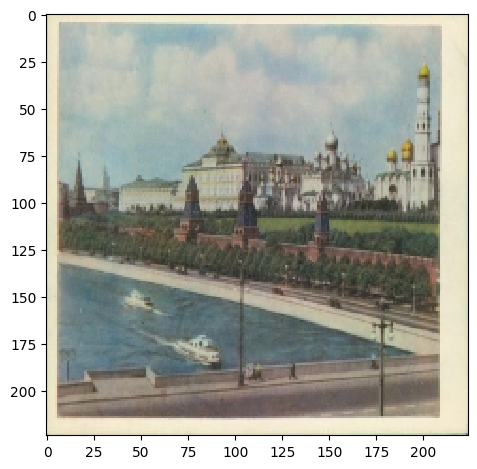

In [134]:
path_to_example_image = PATH_TO_EXAMPLES[3]
img = io.imread(path_to_example_image)
img = cv2.resize(img, (224, 224))

io.imshow(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


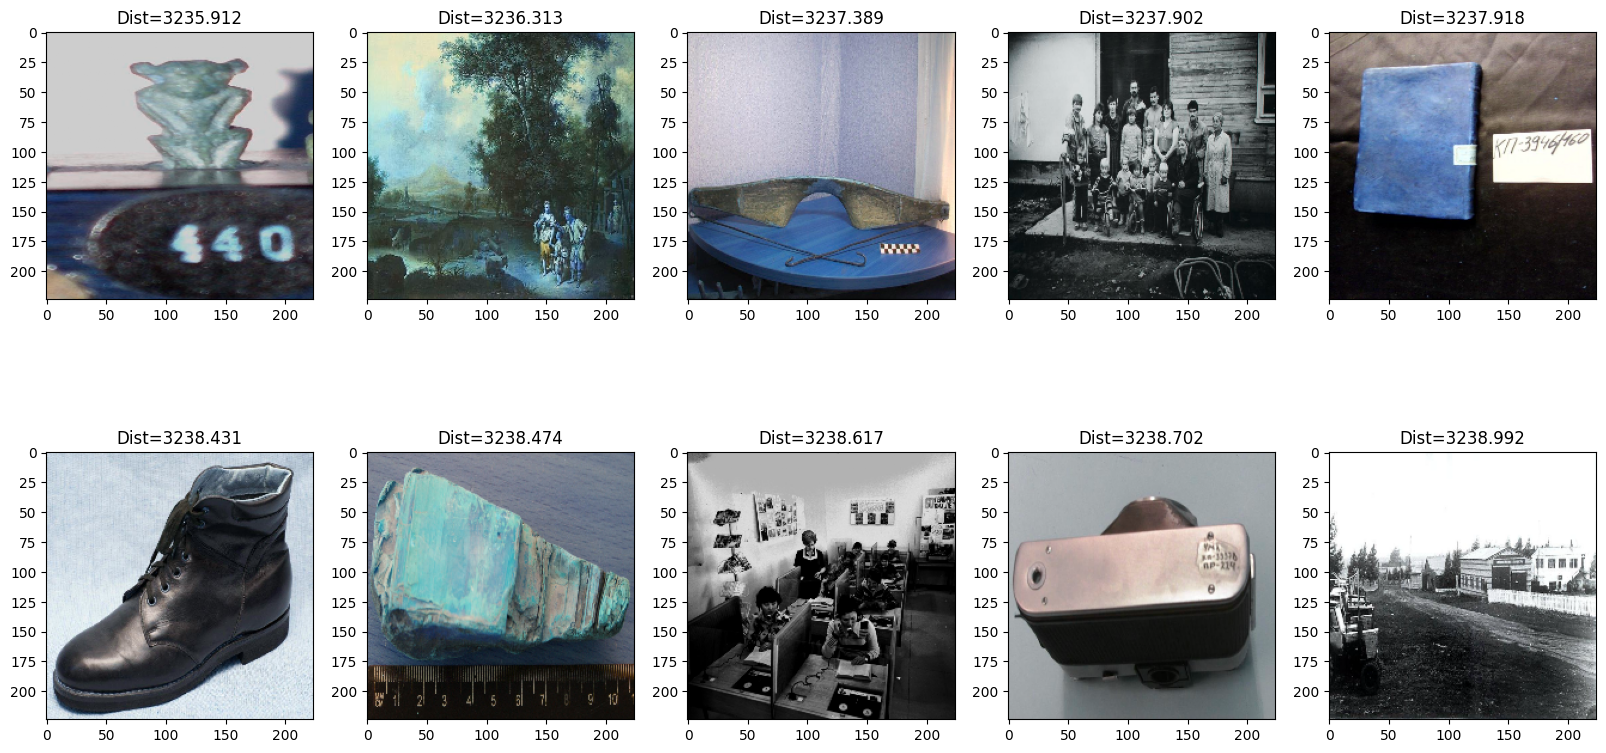

In [135]:
show_similar(img, 10)